# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [11]:
# Q1 (code)
import tomotopy as tp # for toping modeling
import little_mallet_wrapper # for functions concerning topic modeling
import seaborn # for statistical visualization
import glob # for finding pathnames
from pathlib import Path # for filesystem paths with semantics appropriate for different operating systems
import pandas as pd # for data wrangling 
import matplotlib.pyplot as plt #for plotting and visualization

## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [2]:
# Q2 (code)
# load datasets
sanders_df = pd.read_csv('sanders_tweets.csv', encoding = 'utf-8')
trump_df = pd.read_csv('trump_tweets.csv', encoding = 'utf-8')

# concatenate datasets

combined_df = pd.concat([sanders_df, trump_df], ignore_index = True)
combined_df.head()

,Username,TweetId,Title,Content
0,SenSanders,1351670845639421952,SenSanders_1351670845639421952,Wealth increase in past 10 months:\n⬆️$173 bil...
1,SenSanders,1351259762722279424,SenSanders_1351259762722279424,Amidst massive income and wealth inequality te...
2,SenSanders,1351242822293319680,SenSanders_1351242822293319680,"“We now have the resources, we now have the sk..."
3,SenSanders,1350885541911400448,SenSanders_1350885541911400448,"After surviving an attempt on his life, Russia..."
4,SenSanders,1349880150041780224,SenSanders_1349880150041780224,President-Elect Biden's COVID rescue plan will...


### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [3]:
# Q3 (code)
import nltk
from nltk.corpus import stopwords
import string
import re

#  First we should make empty lists for the values
training_data = []
original_texts = []
titles = []

nltk.download('stopwords')

stop_words = stopwords.words('english')
# Process tweets
# Define the unnecessary syntax to remove and some words that occured in the model and are not representative:
text_to_remove = ['https', '//t', 'co/', 'realdonaldtrump', 'amp', 'rt']

# Process the tweets:
for index, row in combined_df.iterrows():
    # Get the text from the 'Content' column:
    text = row['Content']
    # make everything lowercase
    processed_text = text.lower()
    # Remove punctuation
    processed_text = "".join(char for char in processed_text if char not in string.punctuation)
    # Remove stopwords
    processed_text = ' '.join(word for word in processed_text.split() if word not in stop_words)
    # Process the text remove numbers
    processed_text = little_mallet_wrapper.process_string(text, numbers='remove')
    # Remove unnecessary symbols or words
    processed_text = ' '.join(word for word in processed_text.split() if word not in text_to_remove)
    #the code provided
    processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump", '', processed_text, flags=re.MULTILINE)
    # Add processed text to training_data:
    training_data.append(processed_text)
    
    # Add original text to original_texts:
    original_texts.append(text)
    
    # Add title to titles:
    titles.append(row['Title'])



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
len(training_data), len(original_texts), len(titles)

(30371, 30371, 30371)

## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [5]:
# Q4 (code)
# Number of topics to return
num_topics = 10
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

Topic Model Training...


Iteration: 0	Log-likelihood: -9.582704868077716
Iteration: 10	Log-likelihood: -9.23377733552759
Iteration: 20	Log-likelihood: -9.079699792204817
Iteration: 30	Log-likelihood: -8.999996816919591
Iteration: 40	Log-likelihood: -8.944915574521753
Iteration: 50	Log-likelihood: -8.90810796897554
Iteration: 60	Log-likelihood: -8.878383154235019
Iteration: 70	Log-likelihood: -8.857081130896503
Iteration: 80	Log-likelihood: -8.84076311092165
Iteration: 90	Log-likelihood: -8.827418016978568


### Q5. Print out the top words for each topic and manually evaluate their coherence


In [6]:
# Q5a (code)
# Print out top 10 words for each topic
print("\nTopic Model Results:\n\n")

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

jobs economy biden trump president years american change joe ever

✨Topic 1✨

trump president democrats impeachment house senate election party republican schiff

✨Topic 2✨

health care people must right americans drug make need system

✨Topic 3✨

great president thank today whitehouse trump live white tonight house

✨Topic 4✨

tax workers trump people billion working pay must wage million

✨Topic 5✨

must people american america country president together today every trump

✨Topic 6✨

law police federal thank people state god puerto enforcement hurricane

✨Topic 7✨

states great border china united country many would people trade

✨Topic 8✨

news fake media never trump even fbi russia people like

✨Topic 9✨

great vote thank state big total job endorsement military strong



### Manual evaluation of topic coherence.



The topics extracted from Trump and Sanders tweets reveal a range of themes relevant to their political discourse, economic policies, healthcare, international relations, media criticism, and expression of gratitude and support. They reveal in my opinion their core populistic themes of both politicians. Overall, I think they show moderate to good coherence with their respective themes, but we could observe that the coherence between topics varies, with some exhibiting clear thematic consistency and relevance among keywords, while others appear to be more loosely connected or ambiguous.  Perhaps for the later topics we would need a clearer understanding of the context to understand the relevance and coherence. Topics like healthcare legislation (Topic 2), tax policies (Topic 4), demonstrate high coherence, as the keywords within each topic align closely with specific policy areas or issues. Other topics such as expressions of gratitude (Topic 9) and more general themes and topics such as topic 3, and concerns about fake news (Topic 8)  may exhibit lower coherence, as they encompass a broader range of issues and lack clear thematic focus. An example also is topic 6 where there is a focus on police and law enforcement but then keywords such as "god","thank" and "hurricane" show a lack of clear focus. Overall, each topic exhibits a degree of thematic cohesion, with its clusters of words that collectively represent some topics within the broader context of American politics.

## Q5b 
### Describe what each topic is about. What ideas, values, or situations do these keywords refer to?


I will manually interpret my first try of the model, when I trained it with ten topics, as I know that it may be different when you ran it I will provide you with the topics. 

**Topic 0: jobs economy biden trump president years american change joe ever**

This topic seems to focus on economic issues, because it provides a lot of words such as "jobs", "economy", and about presidential leadership with keywords such as "trump" and "biden "change", which could relate to discussions about the presidency of Joe Biden and Trump and their impact on the economy. From a first look it appears coherent and does not have any word that it is very out of the context of economy and presidency. 



**Topic 1: trump president democrats impeachment house senate election party republican schiff**


This topic revolves around political dynamics and the impeachment process, featuring keywords such as "trump," "president," "impeachment," and references to political entities like the House, Senate, and political parties. It likely encompasses discussions about Trump's presidency, the impeachment inquiry, and partisan politics.


**Topic 2: health care people must right americans drug make need system**

This topic focuses on healthcare access and rights, with keywords like "health care," "people," "must," and "right." It likely discusses issues related to healthcare affordability, accessibility, and the rights of Americans to quality healthcare, possibly addressing debates around healthcare reform.

**Topic 3:great president thank today whitehouse trump live white tonight house**

This topic revolves around positive remarks and mentions the White house. It could possibly be associated with Trump administration and his expressions of gratitude.

**Topic 4: tax workers trump people billion working pay must wage million**

This topic focuses on themes such as taxation, employment, and wages, mentioning keywords such as "tax", "workers", "pay", "wage". It is likely reffering to tax policies and the impact of taxation on workers.

**Topic 5: must people american america country president together today every trump**

This topic emphasizes themes of American unity and leadership, with keywords like "must," "people," "American," "country," and "president." It likely discusses the importance of national unity, collective action, and effective leadership in addressing societal challenges and advancing national interests.

**Topic 6: law police federal thank people state god puerto enforcement hurricane**

This topic centers on law enforcement and emergency response, featuring keywords such as "law," "police," "federal," and references to emergencies like hurricanes. It likely encompasses discussions about law enforcement policies, federal responses to emergencies, and issues related to public safety and security.

**Topic 7: states great border china united country many would people trade**


This topic discusses international relations and trade, with keywords like "states," "border," "china," "trade," and references to the United States. It likely addresses topics such as foreign policy, trade agreements, border security, and diplomatic relations with countries like China.


**Topic 8: news fake media never trump even fbi russia people like**

This topic focuses on media criticism and references to disinformation, featuring keywords like "news," "fake," "media," "Trump," and references to entities like the FBI and Russia. It likely encompasses discussions about media biases, fake news, and perceptions of media manipulation, particularly in the context of political discourse and election interference.

**Topic 9: great vote thank state big total job endorsement military strong**

This topic contains expressions of appreciation, endorsements, and references to voting, with keywords like "great," "thank," "vote," and mentions of states, jobs, and the military. It likely encompasses expressions of gratitude for support, endorsements of political candidates, and acknowledgments of contributions from various sectors such as the military.

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [12]:
# retraining model for coherence
# Number of topics to return
num_topics = 5
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

Topic Model Training...


Iteration: 0	Log-likelihood: -9.363269217327952
Iteration: 10	Log-likelihood: -9.153710947615465
Iteration: 20	Log-likelihood: -8.979099164543358
Iteration: 30	Log-likelihood: -8.904930064765582
Iteration: 40	Log-likelihood: -8.870488344880352
Iteration: 50	Log-likelihood: -8.846589303588258
Iteration: 60	Log-likelihood: -8.829909182617019
Iteration: 70	Log-likelihood: -8.814286687020438
Iteration: 80	Log-likelihood: -8.804479350695232
Iteration: 90	Log-likelihood: -8.793848003239324


In [14]:
# Number of topics to return
num_topics = 20
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())

print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')

Topic Model Training...


Iteration: 0	Log-likelihood: -9.833480160031337
Iteration: 10	Log-likelihood: -9.417356062170628
Iteration: 20	Log-likelihood: -9.199029690364869
Iteration: 30	Log-likelihood: -9.078134196822596
Iteration: 40	Log-likelihood: -9.0028296075035
Iteration: 50	Log-likelihood: -8.952602799906648
Iteration: 60	Log-likelihood: -8.90840901473772
Iteration: 70	Log-likelihood: -8.879411359188015
Iteration: 80	Log-likelihood: -8.860223496166778
Iteration: 90	Log-likelihood: -8.845169757228726


In [13]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5120105811953544 
Per Topic: [0.5780821055173874, 0.4268906876444817, 0.6253079384565353, 0.45946435928344725, 0.47030781507492064]



### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

# Q6 
 5 topics ----- Coherence : c_v -----

Average: 0.5120105811953544


 At the beginning I trained the model with five topics and the average coherence score were approximately 0.5. The value is showing that the topics are moderate coherened and could be inproved. I started by decreasing the topic to 3 but I noticed that the coherence score became worse, so I started to increase the number of topics. I finally chose to go with 20 topics as the coherence is improved by more then 10% and the topics are in a number that I can evaluate and reflect on them also manually. I noticed that more topics could aslo give me a better score but would not be so easy in the time span we have to interpet them manually. 
 
 20 topics ----- Coherence : c_v -----

  Average: 0.5875158878788352 

  
Per Topic: [0.5983211264014244, 0.5875759690999984, 0.6034897863864899, 0.5778499573469162, 0.479957839846611, 0.43180184811353683, 0.5231034725904464, 0.6331777274608612, 0.5552518099546433, 0.7635870516300202, 0.673100671172142, 0.4449049383401871, 0.5950305491685868, 0.4474319636821747, 0.627893203496933, 0.5928568117320537, 0.6395718023180962, 0.6388864204287529, 0.730694130063057, 0.6058306783437729]



### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

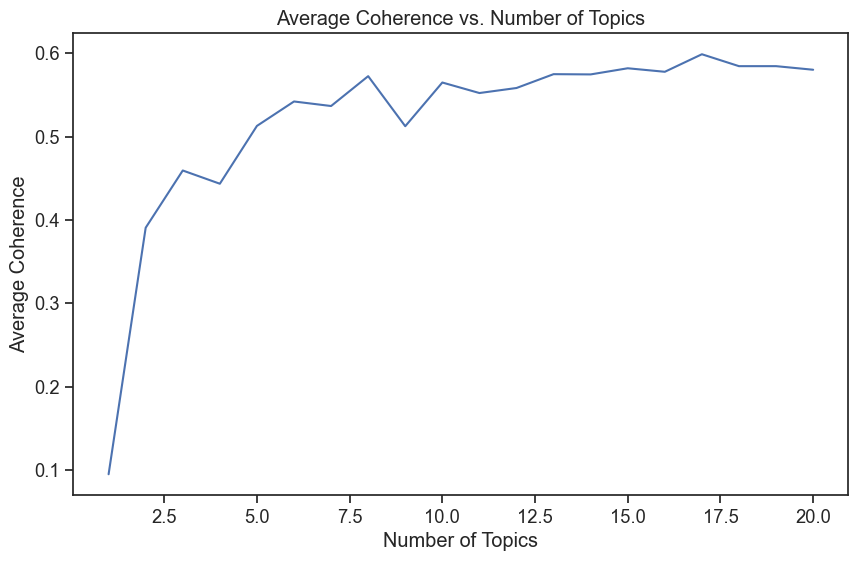

In [57]:
#define function that plots the average coherence

def plot_coherence(training_data, max_topics, iterations):
    coherence_scores = []
    for num_topics in range(1, max_topics + 1):
        
        # Initialize the model:
        model = tp.LDAModel(k=num_topics)
        # Add documents to the model:
        for doc in training_data:
            words = doc.split()
            model.add_doc(words)
        # Train the model:
        for i in range(0, iterations, 10):
            model.train(10)
        
        # Calculate coherence:
        coh = tp.coherence.Coherence(model, coherence='c_v')
        coherence_scores.append(coh.get_score())
        
    # Plot:
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_topics + 1), coherence_scores)
    plt.xlabel('Number of Topics')
    plt.ylabel('Average Coherence')
    plt.title('Average Coherence vs. Number of Topics')
    plt.show()

plot_coherence(training_data, max_topics=20, iterations=100)

### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [16]:
#we will use the 20 topics as we show that it has the best average coherence
# I will present the keywords for each topic
# Print out top 10 words for each topic
print("\nTopic Model Results:\n\n")

topics = []
topic_individual_words = []
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")



Topic Model Results:


✨Topic 0✨

great years people much new back country world one many

✨Topic 1✨

trump president democrats people left never want radical know would

✨Topic 2✨

foxnews puerto hurricane rico tonight enjoy fema seanhannity interviewed local

✨Topic 3✨

biden joe election trump vote votes voting fraud voter ballots

✨Topic 4✨

climate change energy fossil planet fuel clean industry oil crisis

✨Topic 5✨

border china trade states deal wall country united mexico democrats

✨Topic 6✨

health care total endorsement complete military strong amendment vets people

✨Topic 7✨

democrats impeachment president house schiff senate nothing call dems ukraine

✨Topic 8✨

great thank president united forward new states today book house

✨Topic 9✨

korea north covid iran free debt public student college must

✨Topic 10✨

workers pay americans wage people million must drug america year

✨Topic 11✨

president house trump today whitehouse national bill senate white american

✨Topic 1

In [21]:
# Q7a (code
#we will use the 20 topics as we show that it has the best average coherence
#finding topic distributions
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

from IPython.display import Markdown, display
import re
# most of this code is taken from week 6 notebook aswell

def make_md(string):
    display(Markdown(str(string)))

def get_top_docs(docs, topic_distributions, topic_index, n=5):

    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)

    topic_words = topics[topic_index]

    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n")
    print("---")

    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc:
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)

        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')

    return

### Topics that it is my hypothesis that there are more related to Trump.

In [25]:
get_top_docs(original_texts, topic_distributions, topic_index=5, n=5)
get_top_docs(original_texts, topic_distributions, topic_index=11, n=5)
get_top_docs(original_texts, topic_distributions, topic_index=19, n=5)

### ✨Topic 5✨

border china trade states deal wall country united mexico democrats



---


✨  
**Topic Probability**: 0.9276484251022339  
**Document**:  MAKE AMERICA GREAT AGAIN! https://t.co/Y6UPREMY7u https://t.co/6r7wdYDf66



✨  
**Topic Probability**: 0.9248741865158081  
**Document**:  Massive overflow crowds in Grand Rapids, Michigan tonight. Thank you for joining us tonight! #MAGA https://t.co/KQ5hTZAXsk



✨  
**Topic Probability**: 0.9186345934867859  
**Document**:  RT @WhiteHouse: President @realDonaldTrump hosted the 2018 World Series Champions, the Boston @RedSox, at the White House! https://t.co/68fDd6Mu8U



✨  
**Topic Probability**: 0.9186345934867859  
**Document**:  ....If we bought 15 Billion Dollars of Agriculture from our Farmers, far more than China buys now, we would have more than 85 Billion Dollars left over for new Infrastructure, Healthcare, or anything else. China would greatly slow down, and we would automatically speed up!



✨  
**Topic Probability**: 0.9151092767715454  
**Document**:  We must maintain a Strong Southern Border. We cannot allow our Country to be overrun by illegal immigrants as the Democrats tell their phony stories of sadness and grief, hoping it will help them in the elections. Obama and others had the same pictures, and did nothing about it!



### ✨Topic 11✨

president house trump today whitehouse national bill senate white american



---


✨  
**Topic Probability**: 0.8598724603652954  
**Document**:  ....Also, according to the Daily Caller, leading Sleepy Joe Biden in Florida, 48% to 42%.



✨  
**Topic Probability**: 0.858966052532196  
**Document**:  Very importantly, @RepDanDonovan will win for the Republicans in November...and his opponent will not. Remember Alabama. We can’t take any chances on losing to a Nancy Pelosi controlled Democrat!



✨  
**Topic Probability**: 0.8491595983505249  
**Document**:  https://t.co/VMEU0QBEHA



✨  
**Topic Probability**: 0.8366730809211731  
**Document**:  MAKE AMERICA GREAT AGAIN! https://t.co/ZcvCqqitui



✨  
**Topic Probability**: 0.8219327330589294  
**Document**:  I love Michigan, one of the reasons we are doing such a GREAT job for them during this horrible Pandemic. Yet your Governor, Gretchen “Half” Whitmer is way in over her head, she doesn’t have a clue. Likes blaming everyone for her own ineptitude! #MAGA



### ✨Topic 19✨

fbi trump russia collusion mueller hillary campaign clinton obama witch



---


✨  
**Topic Probability**: 0.931570291519165  
**Document**:  ....The United States looses soooo much money on Trade with Mexico under NAFTA, over 75 Billion Dollars a year (not including Drug Money which would be many times that amount), that I would consider closing the Southern Border a “profit making operation.” We build a Wall or.....



✨  
**Topic Probability**: 0.9291333556175232  
**Document**:  RT @aldresser: As a Phoenix firefighter  and member of the IAFF I was surprised and pleased to learn that the only money that goes to federal elections (Joe Biden) come from  the IAFF ‘s Firepac.Donations many of us are going to the union office to cancel immediately#FirefightersForTrump



✨  
**Topic Probability**: 0.9173616766929626  
**Document**:  RT @EricTrump: The Democratic Party has no message, accomplishments or leadership so all they do is harass my father &amp; our family. Congress do you job - the American people are sick of your total incompetence. Eric Trump blasts House subpoenas | TheHill https://t.co/qYxHkP2iZe



✨  
**Topic Probability**: 0.9056011438369751  
**Document**:  RT @fema: Rain from #Florence these next few days will cause flooding in many parts of the Carolinas. Expect flash flooding at any time and stay off the roads. Do NOT walk, swim or drive through floodwaters! https://t.co/KI7H0Mfs5Z



✨  
**Topic Probability**: 0.9056011438369751  
**Document**:  RT @dcexaminer: Trump: 'Which is easier: dealing with the Democrats or dealing with the Middle East.'   Mnuchin: '...I'll be hopeful that we can deal with the Democrats.'   Trump: 'The Middle East is more reasonable. https://t.co/jGOfUcVM2k



### Topic I think are more relevant to Sanders

In [29]:
get_top_docs(original_texts, topic_distributions, topic_index= 4, n=5)
get_top_docs(original_texts, topic_distributions, topic_index= 10, n=5)
get_top_docs(original_texts, topic_distributions, topic_index= 13, n=5)

### ✨Topic 4✨

climate change energy fossil planet fuel clean industry oil crisis



---


✨  
**Topic Probability**: 0.9490941166877747  
**Document**: What does it mean when the function of the health care system—in the richest country in the history of the world—is to make billions for insurance and drug companies? 

18 percent of Americans with diabetes are rationing the medications they need to live. https://t.co/zyDjSiA3FP



✨  
**Topic Probability**: 0.9464204907417297  
**Document**:  Great day at the #G20Summit in Buenos Aires, Argentina. Thank you! https://t.co/4IHvUdOygc



✨  
**Topic Probability**: 0.9434505105018616  
**Document**: Half of our seniors survive on $25,000 a year or less.

Outrageously, Trump tried to make them jump through hoops during a pandemic to get their $1,200 emergency relief payment.

Thanks to strong pressure, Trump reversed this policy. Seniors will get the help they need right now.



✨  
**Topic Probability**: 0.9418385028839111  
**Document**: You want good, **clean** teeth? Simple: Brush your teeth, floss, and fight for Medicare for All. https://t.co/6BVEdHgYzY



✨  
**Topic Probability**: 0.936399519443512  
**Document**: I could be wrong, but I don’t think Trump is going to be explaining tonight why he tried to throw 32 million people off of health insurance. #StateOfTheUnion



### ✨Topic 10✨

workers pay americans wage people million must drug america year



---


✨  
**Topic Probability**: 0.9215704202651978  
**Document**: Billionaire Wall Street investors think they’re pretty savvy. But their big bet on fossil fuels didn’t pan out: BlackRock lost $90 billion investing in oil and coal over 10 years. 

Maybe after a few billion more in losses, they’ll realize we should act to solve climate change.



✨  
**Topic Probability**: 0.9109143614768982  
**Document**: Cardi B is right. If we are really going to make America great we need to strengthen Social Security so that seniors are able to retire with the dignity they deserve. https://t.co/B8cOkoOdLc



✨  
**Topic Probability**: 0.9066883325576782  
**Document**: The Trump tax cuts are rewarding Wells Fargo—the bank that defrauded millions of customers last **year**—with $3.7 billion. How does that make sense? https://t.co/quWkIAUCsv



✨  
**Topic Probability**: 0.9066883325576782  
**Document**: I stand with the **people** of Puerto Rico, who have taken to the streets for a national strike, to demand the immediate resignation of Governor Rosselló. We **must** ensure the full support of the federal government in the rebuilding and recovery of Puerto Rico.



✨  
**Topic Probability**: 0.9013627767562866  
**Document**: The Walton family is worth $238 billion. Yet they **pay** wages so low, 14,541 of their **workers** in 9 states are forced to rely on food stamps to feed their families. Outrageous.

I say to the Walton family: Get off welfare. Pay your **workers** a living **wage**—at least $15 an hour.



### ✨Topic 13✨

tax trump war republicans class must working social security congress



---


✨  
**Topic Probability**: 0.929898738861084  
**Document**: This Fox News judge does a great job explaining why President Trump is in real trouble. https://t.co/OysCloV5Xs



✨  
**Topic Probability**: 0.9273101091384888  
**Document**: Walmart insists it can't afford to pay workers $15/hr. Really? The Walton family, which owns Walmart, is the richest family in America—worth around $167 billion.

Walmart: do the right thing. Raise your minimum wage to a living wage of $15/hr. #BlackFriday
https://t.co/YJkyT2UEln



✨  
**Topic Probability**: 0.9147123694419861  
**Document**: Trump talked about how he was going to take on the greed of Wall Street which he said “has caused tremendous problems for us.” Then he appointed more Wall Street billionaires to his administration than any president in history. #BernieResponds https://t.co/iOHPKUIupL



✨  
**Topic Probability**: 0.9147123694419861  
**Document**: He promised to lower the cost of prescription drugs but then nominated Alex Azar, a former pharmaceutical industry executive, as head of the Health and Human Services agency.



✨  
**Topic Probability**: 0.9108497500419617  
**Document**: At a time when voting rights are under grave attack, there is absolutely no place on the federal bench for Thomas Farr, who both authored and defended tactics designed to suppress minority voters. I strongly oppose his nomination.



Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

## Q7b (words)

**Topic I find more relevant to Trumps tweets**


Based on the topic probabilities and the content of the documents associated with each topic, it is evident that the topics I hypothesized to be dominated by Trump indeed align with his themes and messages.

Topic 5: It appears to focus on issues related to border security, trade with China, and the construction of the wall along the southern border. The documents associated with this topic reinforce Trump's emphasis on these issues, with mentions of "border," "China," and "trade." The tweet about maintaining a strong southern border and preventing illegal immigration aligns perfectly with this theme.

Topic 11: This topic revolves around Trump's presidency, featuring mentions of the White House, national bills, and American identity. The documents associated with this topic reflect Trump's messaging about his accomplishments and priorities as president, with tweets praising his leadership during the pandemic and criticizing Governor Whitmer of Michigan..

Topic 19: This topic focuses on controversies surrounding the FBI, Russia collusion, and investigations into Trump's campaign and his political opponents. The documents associated with this topic include tweets discussing trade deficits with Mexico, attacks on the Democratic Party's leadership, and comparisons between dealing with Democrats and negotiating with the Middle East.

**Topics I find more relevant to Sanders**

The topic distributions and their associated documents I have selected as more prominent to be dominated by Bernie Sanders, indeed align closely with his views and position, as well as his rhetoric.

Topic 4: This topic appears to focus on issues related to healthcare, with mentions of insurance and drug companies, diabetes medication, and Medicare for All. The documents associated with this topic reinforce Sanders' advocacy for universal healthcare and criticism of the current healthcare system, particularly its focus on profit rather than patient care. The results align with his views on health care, as it consists one of his key political positions. 


Topic 10: This topic revolves around economic issues, particularly workers' rights and wages, with mentions of billionaires, social security, and the minimum wage. The documents associated with this topic reflect Sanders' focus on income inequality and his calls for policies to ensure fair wages and economic justice for all Americans. This topic and its related documents are consistent with left wing populist opinion in the public discourse and are indicative of Sanders views.


Topi13 8: This topicenters on critiques of the Trump administration and Republicans, with mentions of taxes, war, social security, and Congress. The documents associated with this topic reflect Sanders' criticism of Trump's policies and appointments, particularly regarding taxes, Wall Street, and healthcare.s.

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [30]:
# Crete a sample of tweets
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()
import seaborn as sns
from random import sample

target_labels = sample(titles, 100)


In [37]:
# Function to get the topic distribution for each tweet in the random sample
def visualize_topic_distributions(labels, topic_distributions, topic_keys,
    output_path=None, target_labels=None, dim=None):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
        if not target_labels or _label in target_labels:
            for _topic_index, _probability  in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                     'Category':_label,
                                     'Topic': 'Topic'+str(_topic_index).zfill(2)+ ': ' + ' '.join(topic_keys[_topic_index][:5])})
    
    # Create a dataframe for the heatmap function, and fix the columns
    df_to_plot = pd.DataFrame(dicts_to_plot)
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    if dim:
        plt.figure(figsize=dim)
    sns.set(style='ticks', font_scale=1.2)
    ax = sns.heatmap(df_norm_col, cmap="YlGnBu")
    ax.xaxis.tick_top()
    ax.xaxis.set_label_position('top')
    plt.xticks(rotation=30, ha='left')
    plt.tight_layout()
    plt.show()

 
   

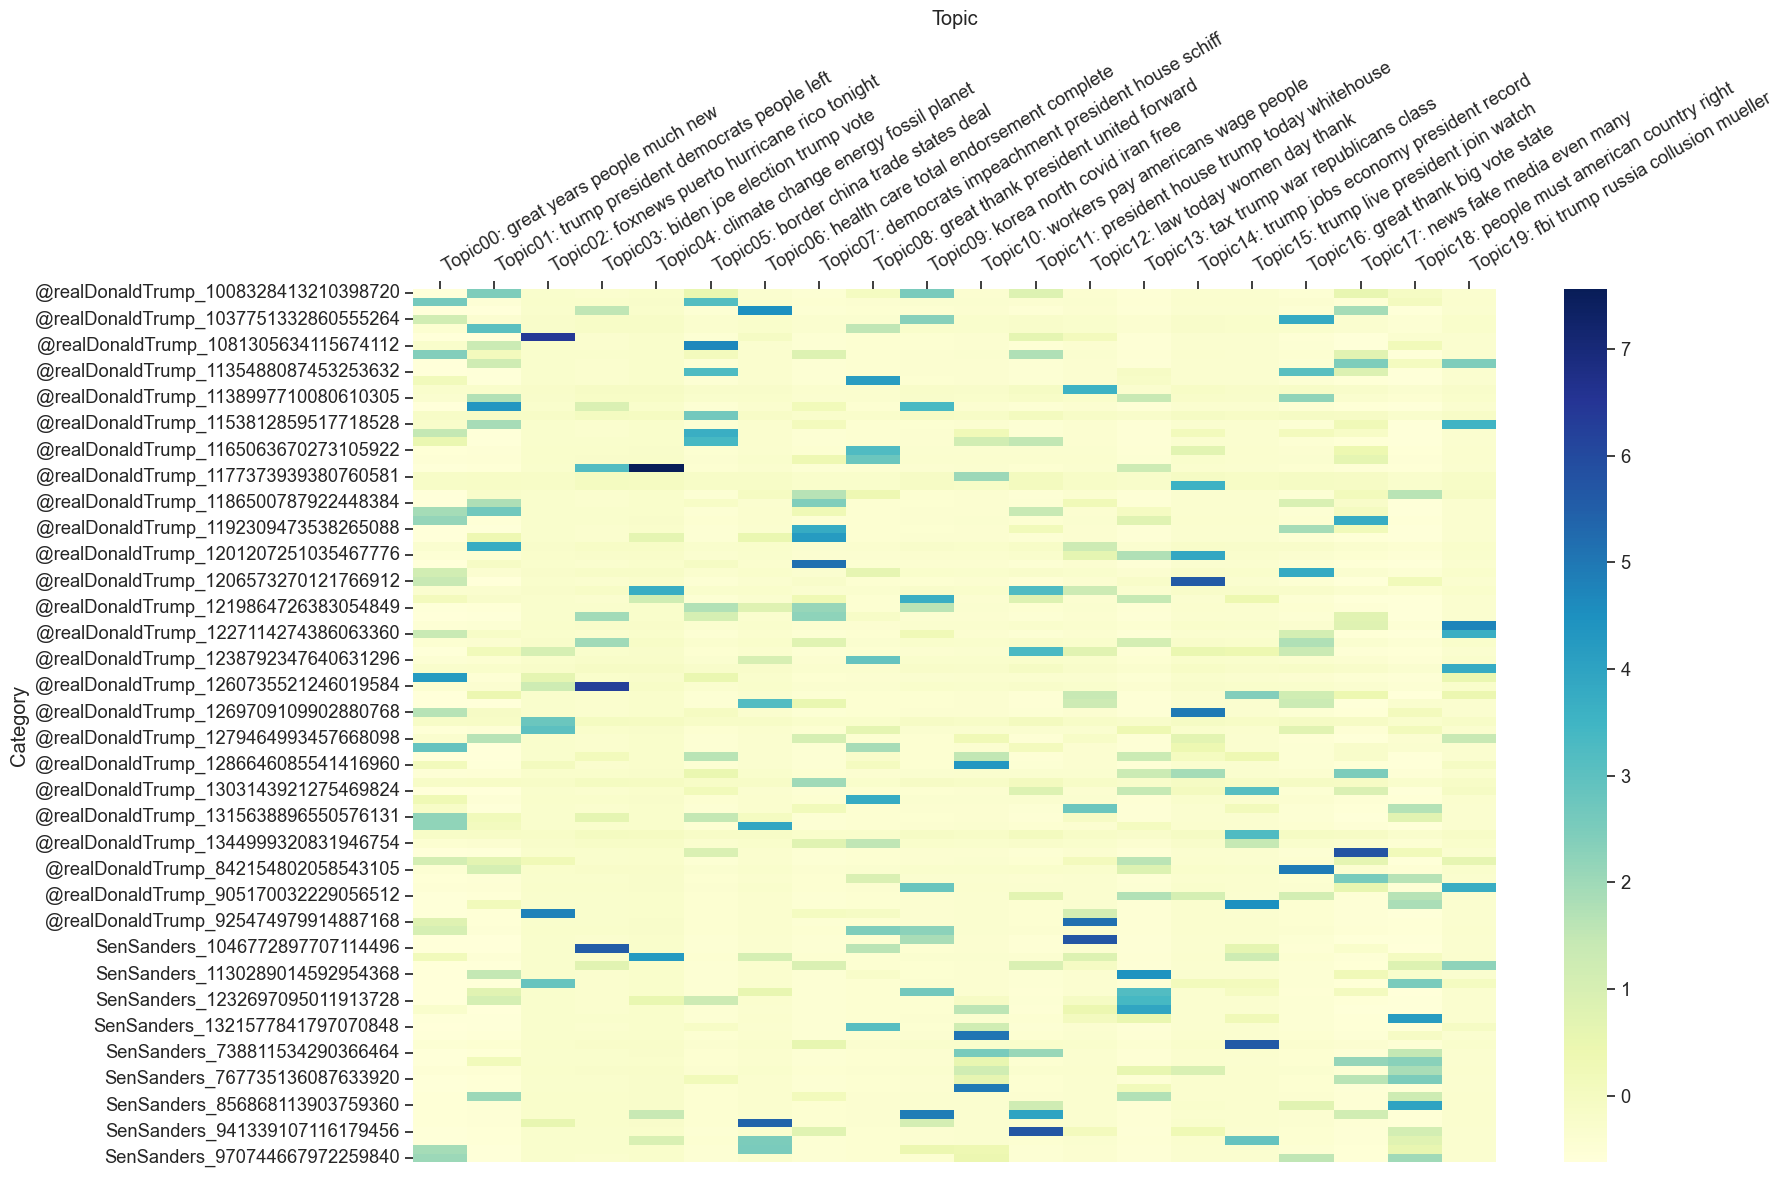

In [39]:
visualize_topic_distributions(titles, topic_distributions,topic_individual_words, target_labels = target_labels,dim=(18,12))

### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

## Q9 (words)


The heatmap for topic relevance for each politician can give us an better idea of the themes and discussions that are more important for Trump and for Sanders respectively. By doing the topic probability distributions for a random sample of tweets from both politicians, we can actually see for each topic how relevant is for a random selection of tweet for each of the politicians. Firsty, we can see for example that Topic 1, 5  and 7 are more representative of Trump tweets. Many of Trump tweets are more colored and bold indicating a higher topic relevance in his tweets. This is reasonable as these topics align closely with his political rhetoric. Topic 1 portrays democrats as extremes and opposes their policies. This is a confrontational approach towards political opponents which is evident in Trumps public statements. Additionaly Topic 5 is also representative of Trump as it revolves around issues related to border security and trade with Chine. These are known core themes in Trump's political rhetoric, reflecting his emphasis on immigration policies and trade deals that prioritize American interests. Topic 7 speaks about democrat's impeachment efforts against Trump, with mentions of Shiff, the House, and the Senate, which is also a frequent theme of discussion in his political rhetoric and public statements. He frequently attacks on the impeachment process, portraying it as a partisan witch hunt orchestrated by democrats in order to undermine his presidency. Moreover, Topics like 8 and 16 are also more indicative of Trumps rhetoric as they revolve around expressions of gratitude to his supporters and the american country. 
Although tha sample is imbalanced and the tweets from Sanders are considerably less than those of Trump, the results of the topic distributions in Sanders tweets in the above heatmap are indicative of his political rhetoric and his key themes and messages. For example, topic 6, which centers on healthcare, endorsements, the military and support to the veterans, aligns closely with core themes in Sanders' political platform, reflecting his advocacy for Medicare for All, and his emphasis on supporting veterans's rights. Additionally, topic 13 revolves around taxes, wars, social security, and Congress. These topics are consistent with Sanders' critique of corporate influence in politics, his opposition to costly military interventions, and his advocacy for social security and economic justice. Sanders often denounces the influence of wealthy elites and big corporations on government policies and calls for progressive tax reforms to fund social programs and address income inequality. Moreover, topic 18 which talks about unity, rights and solidarity also aligns with his frequent emphasis in his public statement abouot the importance of solidarity and unity among Americans, advocating for social justice, civil rights, and equality for all. He often speaks about the need to stand together as a nation to address systemic injustices and build a fairer and more equitable society.
Overall, despite the imbalance in the number of tweets for each politician, the heatmap of the topic distributions clearly represents their key political messages and the topics that are more relevant for each politician align with their political positions and their rhetoric. 

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

In [40]:
# X2 (code)
# Filter tweets by Trump and Sanders
import random


trump_tweets = []
sanders_tweets = []

# Iterate through titles and select tweets for each politician
for title in titles:
    if  title.split('_')[0] == '@realDonaldTrump' and len(trump_tweets) < 50:
        trump_tweets.append(title)
    elif title.split('_')[0] == 'SenSanders' and len (sanders_tweets) < 50:
        sanders_tweets.append(title)

    if len(trump_tweets) == 50 and len(sanders_tweets) == 50:
        break
    
   

# Combine the selected tweets for both politicians
balanced_sample = trump_tweets + sanders_tweets



len(balanced_sample)
target_labels = balanced_sample

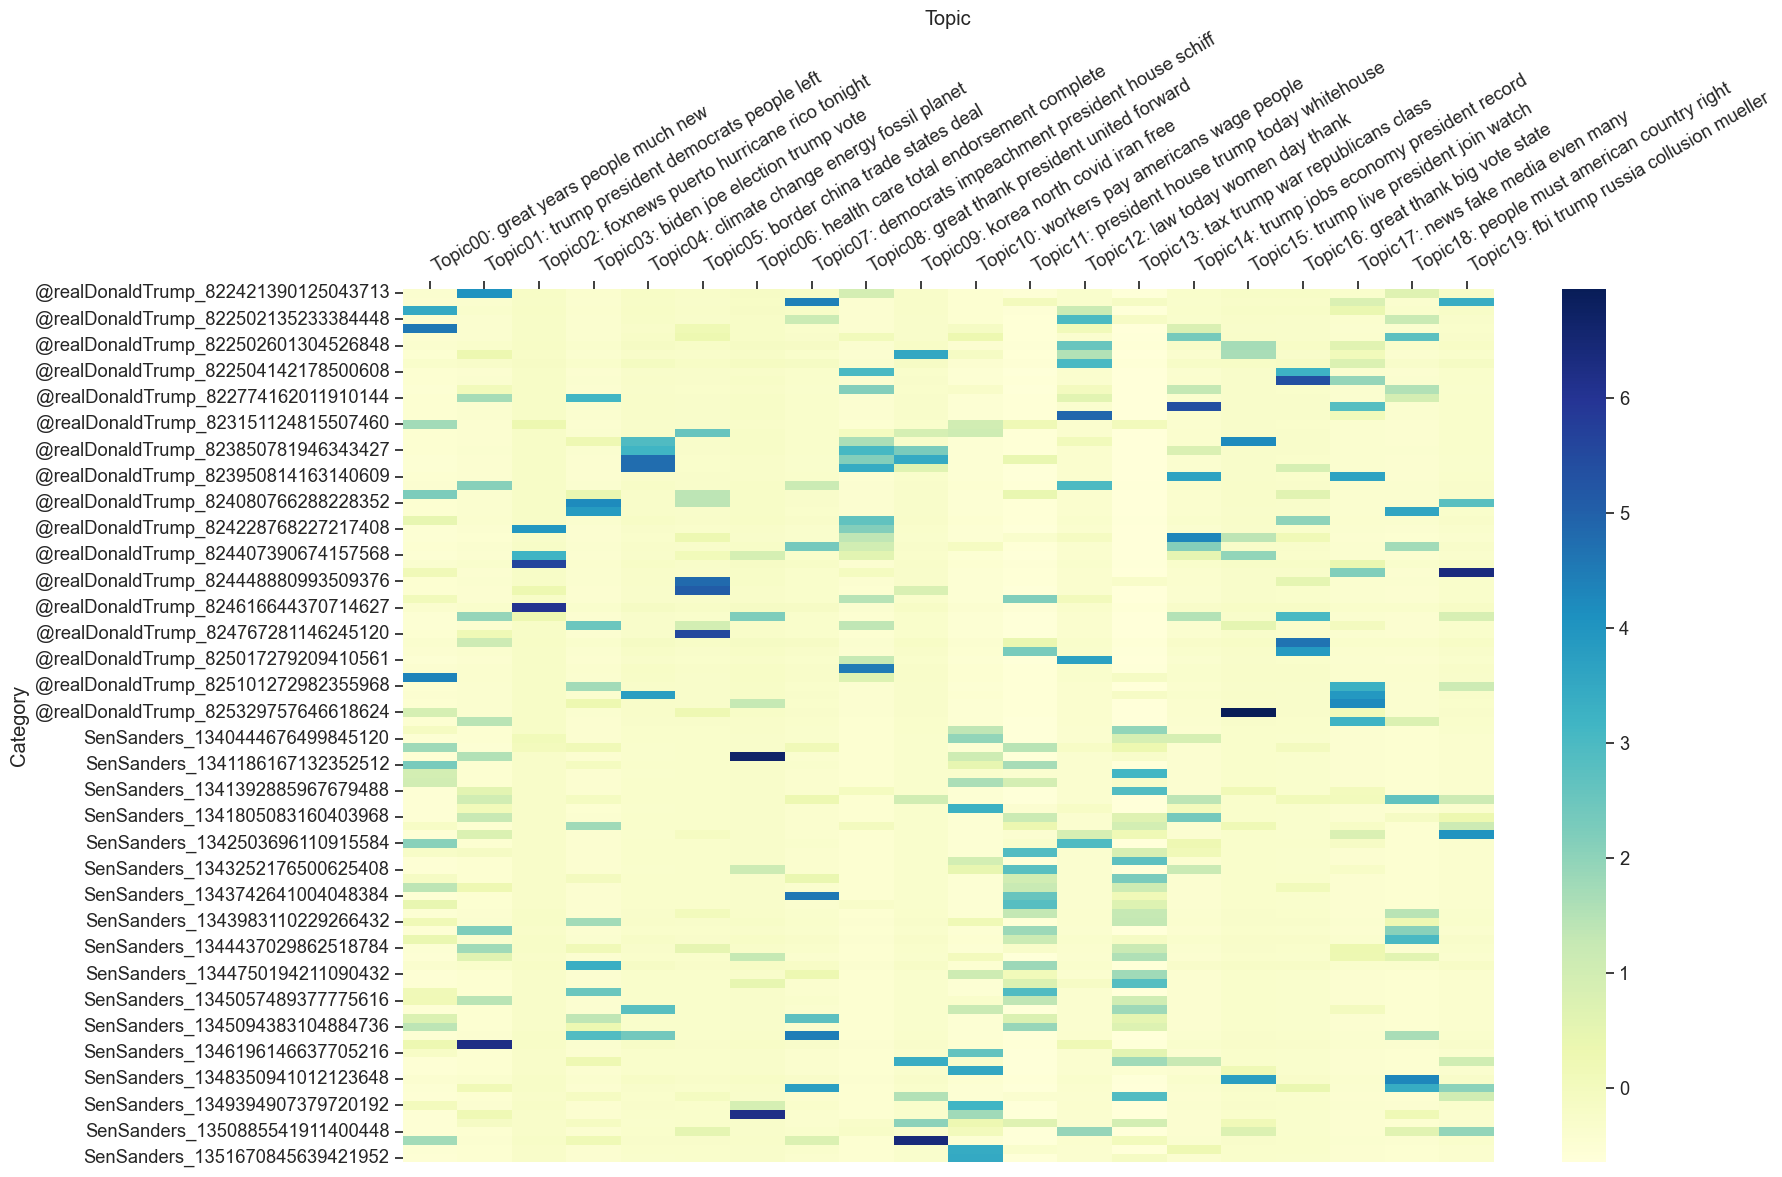

In [41]:
visualize_topic_distributions(titles, topic_distributions,topic_individual_words, target_labels = target_labels,dim=(18,12))

### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [46]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)


titles = titles

# Combine the labels and distributions into a list of dictionaries.
dicts_to_plot = []
for _label, _distribution in zip(titles, topic_distributions):
    if not titles or _label in titles:
        for _topic_index, _probability in enumerate(_distribution):
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_individual_words[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
df_to_plot = pd.DataFrame(dicts_to_plot)
df_wide = df_to_plot.pivot_table(index='Category',
                                columns='Topic',
                                values='Probability')
df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

In [48]:
# Calculate the mean probability per topic for all tweets of Trump and Sanders
trump_avg_probabilities = df_norm_col[df_norm_col.index.str.startswith('@realDonaldTrump')].mean()
sanders_avg_probabilities = df_norm_col[df_norm_col.index.str.startswith('SenSanders')].mean()

# Filter topics more likely to be representative of Trump and Sanders
trump_positive_avg = trump_avg_probabilities[trump_avg_probabilities > 0]
sanders_positive_avg = sanders_avg_probabilities[sanders_avg_probabilities > 0]

print("\nTopics more representative of Trump")
print(trump_positive_avg)

print("\nTopics more representative of Sanders")
print(sanders_positive_avg)



Topics more likely to be representative of Trump
Topic
Topic 00: great years people much new                     0.067019
Topic 01: trump president democrats people left           0.036516
Topic 02: foxnews puerto hurricane rico tonight           0.053840
Topic 03: biden joe election trump vote                   0.063711
Topic 05: border china trade states deal                  0.055171
Topic 07: democrats impeachment president house schiff    0.078403
Topic 08: great thank president united forward            0.082361
Topic 11: president house trump today whitehouse          0.027734
Topic 12: law today women day thank                       0.029947
Topic 14: trump jobs economy president record             0.052437
Topic 15: trump live president join watch                 0.010545
Topic 16: great thank big vote state                      0.104169
Topic 17: news fake media even many                       0.098734
Topic 19: fbi trump russia collusion mueller              0.075403
dtype:

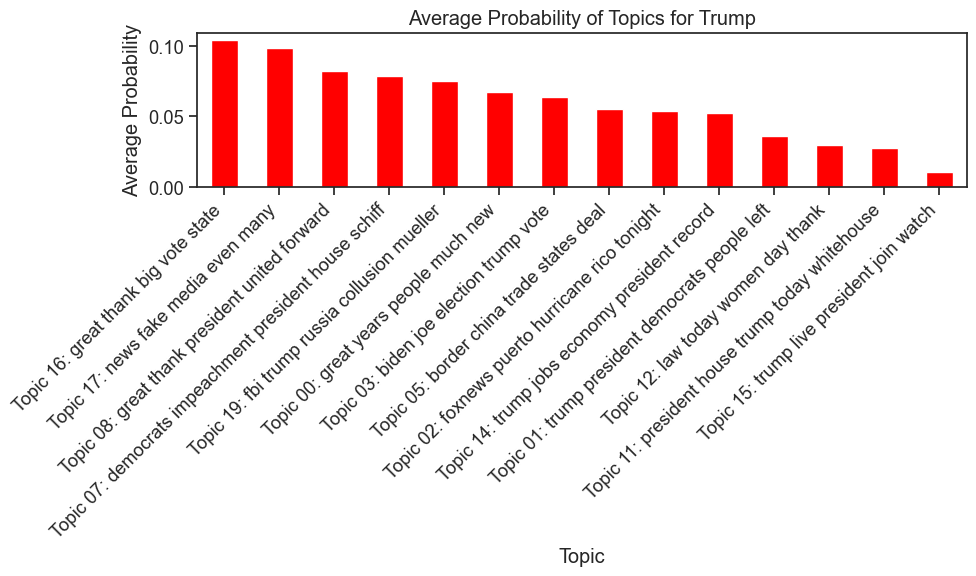

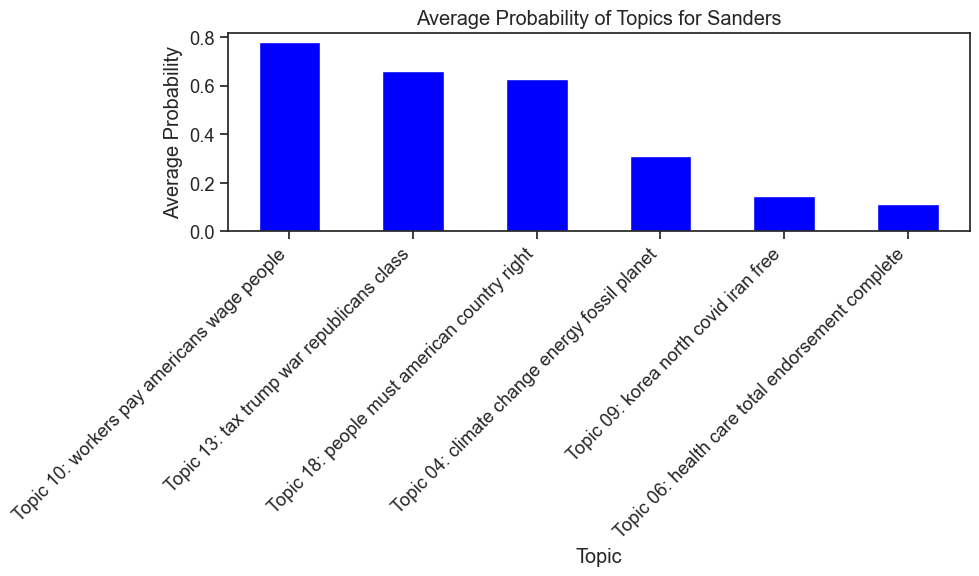

In [55]:
# Plot average probabilities for Trump
plt.figure(figsize=(10, 6))
trump_positive_avg_sorted = trump_positive_avg.sort_values(ascending=False)  # Sort the series
trump_positive_avg_sorted.plot(kind='bar', color='red')
plt.title('Average Probability of Topics for Trump')
plt.xlabel('Topic')
plt.ylabel('Average Probability')
plt.xticks(range(len(trump_positive_avg_sorted)), trump_positive_avg_sorted.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot average probabilities for Sanders
plt.figure(figsize=(10, 6))
sanders_positive_avg_sorted = sanders_positive_avg.sort_values(ascending=False)  # Sort the series
sanders_positive_avg_sorted.plot(kind='bar', color='blue')
plt.title('Average Probability of Topics for Sanders')
plt.xlabel('Topic')
plt.ylabel('Average Probability')
plt.xticks(range(len(sanders_positive_avg_sorted)), sanders_positive_avg_sorted.index, rotation=45, ha='right')
plt.tight_layout()
plt.show()


### Interpretation

Firstly, we see from the results, that a greater number of topics (16) have a positive average topic distribution in Trumps tweets. This could indicate a broader range in topics discussed in his tweets compared to Sanders and a difference in his communication strategy that could involve addressing a wide array of issues. On the other hand, it seems that Sanders is more focused on specific issues and policy areas such as healthcare reform, income inequality and climate change. His consistency in what issues he addresses lead to a higher concentration of tweets centered around specific topics. This is why his average probability in the 6 topics are considerably higher than the average probability of Trumps more relevant topics. This difference in topic distributions reflect their distinct rhetorical styles and strategies of each politician. Trump often uses provocative language and controversial statements to capture attention and drive his political agenda, whereas Sanders is using a more policy focused language to appeal to his audience and advocate progressive reformative policies. Overall, the topics are representative of each politician political agenda, political rhetoric and communication strategies. 